In [1]:
cp /content/drive/MyDrive/deeplearning/archive.zip /content

In [2]:
!unzip /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [71]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img 
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob


In [75]:
train_path = '/content/fruits-360_dataset/fruits-360/Training/'
test_path = '/content/fruits-360_dataset/fruits-360/Test/'

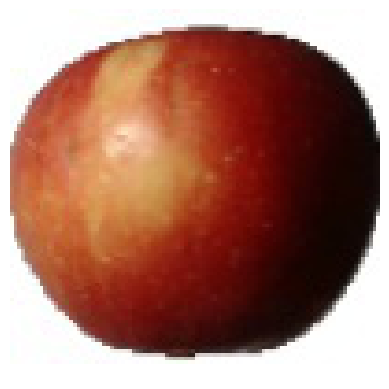

In [76]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

In [67]:
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Blueberry','Lemon', 'Kiwi']

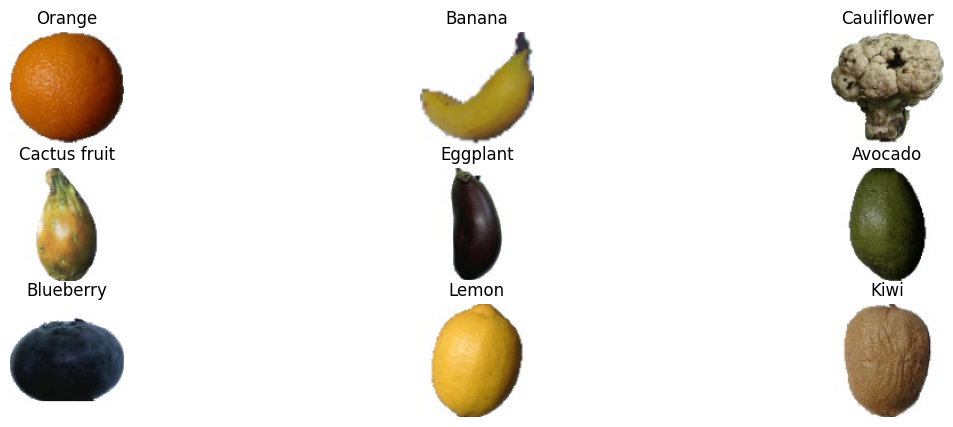

In [77]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(15,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    #fig.patch.set_facecolor('#E53090')
    #Above code adds a background color for subplots you can change the hex color code as you wish
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [78]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [79]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [80]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))

In [81]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [86]:
batch_size = 32

In [87]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [88]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 1600 // batch_size,
                   epochs = 50,
                   validation_data = test_generator,
                   validation_steps = 800 // batch_size)

<ipython-input-88-3415c695154e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/50
50/50 [==============================] - 45s 879ms/step - loss: 4.7373 - accuracy: 0.0231 - val_loss: 4.2772 - val_accuracy: 0.0413
Epoch 2/50
50/50 [==============================] - 36s 725ms/step - loss: 4.0618 - accuracy: 0.0650 - val_loss: 3.4952 - val_accuracy: 0.1187
Epoch 3/50
50/50 [==============================] - 36s 713ms/step - loss: 3.5276 - accuracy: 0.1231 - val_loss: 2.9585 - val_accuracy: 0.2250
Epoch 4/50
50/50 [==============================] - 36s 716ms/step - loss: 3.0427 - accuracy: 0.1875 - val_loss: 2.4210 - val_accuracy: 0.3700
Epoch 5/50
50/50 [==============================] - 35s 711ms/step - loss: 2.5502 - accuracy: 0.2856 - val_loss: 1.9431 - val_accuracy: 0.4737
Epoch 6/50
50/50 [==============================] - 35s 704ms/step - loss: 2.2223 - accuracy: 0.3625 - val_loss: 1.8781 - val_accuracy: 0.4700
Epoch 7/50
50/50 [==============================] - 34s 680ms/step - loss: 1.9173 - accuracy: 0.4139 - val_loss: 1.7240 - val_accuracy: 0.4725

In [89]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


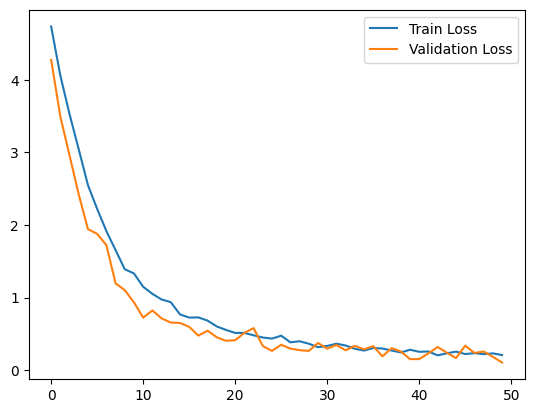

In [90]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

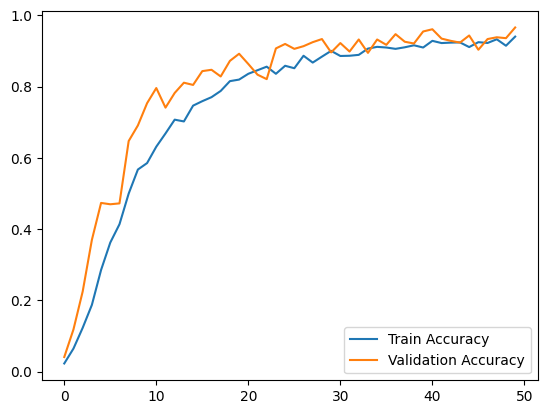

In [91]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()